<a href="https://colab.research.google.com/github/omkargadhe/Mask_RCNN/blob/master/mask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!git clone https://github.com/omkargadhe/Mask_RCNN
import sys
sys.path.append("/content/Mask_RCNN/demo")
from train_mask_rcnn_demo import *
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 158 (delta 18), reused 90 (delta 2), pack-reused 0
Receiving objects: 100% (158/158), 115.23 MiB | 29.26 MiB/s, done.
Resolving deltas: 100% (18/18), done.
VERS 0.2


Using TensorFlow backend.


... done downloading pretrained model!


In [12]:
# Extract Images
images_path = "/content/Mask_RCNN/dataset.zip"
annotations_path = "/content/Mask_RCNN/annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 1000 images


In [13]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/Mask_RCNN/annotations.json
Annotation json path:  /content/Mask_RCNN/annotations.json
Train: 889
Validation: 111
Classes: 1


In [14]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [15]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)




Starting at epoch 0. LR=0.002

Checkpoint Path: /content/Mask_RCNN/logs/object20211020T1428/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

Process ForkPoolWorker-4:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._ar

KeyboardInterrupt: ignored

In [16]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20211020T1428/mask_rcnn_object_0001.h5
Re-starting from epoch 1


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


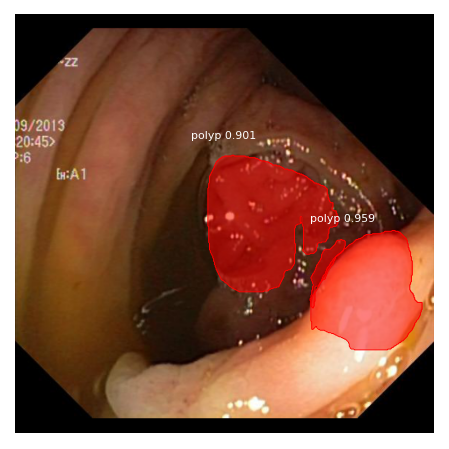

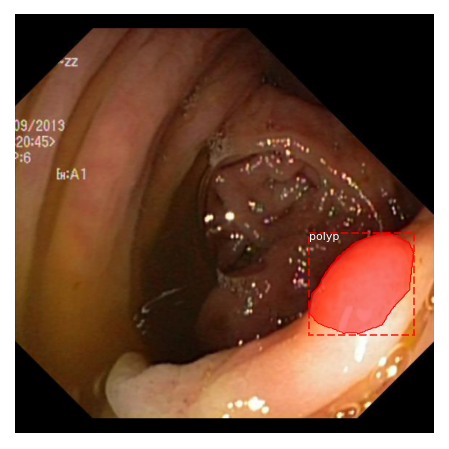

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

In [17]:
!pip install glob2

In [18]:
import cv2
import glob

my_list=[]  #Empty list to store images from the folder.
path = "/content/Mask_RCNN/test_img/*.*"
for file in glob.glob(path):   #Iterate through each file in the list using for
    a= cv2.imread(file)  #now, we can read each file since we have the full path
    my_list.append(a)  #Create a list of images (not just file names but full images)
    

Loading weights from  /content/Mask_RCNN/logs/object20211020T1428/mask_rcnn_object_0001.h5
Re-starting from epoch 1


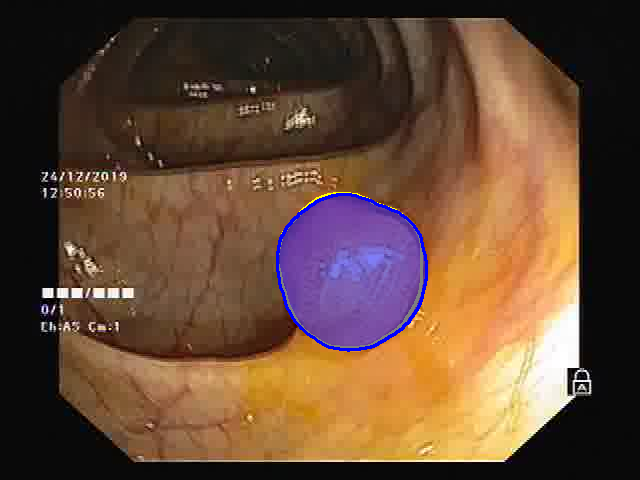

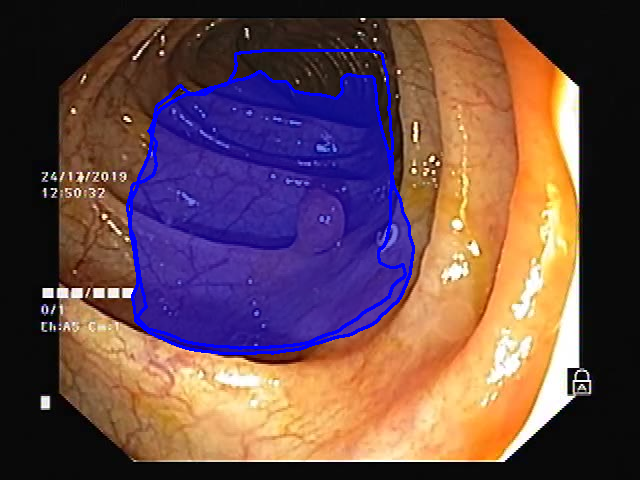

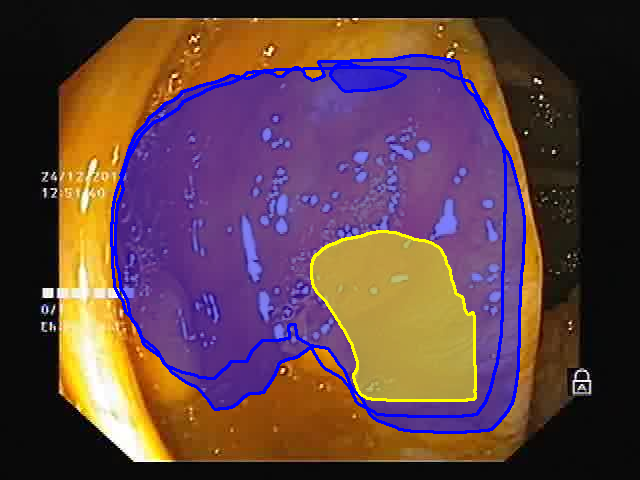

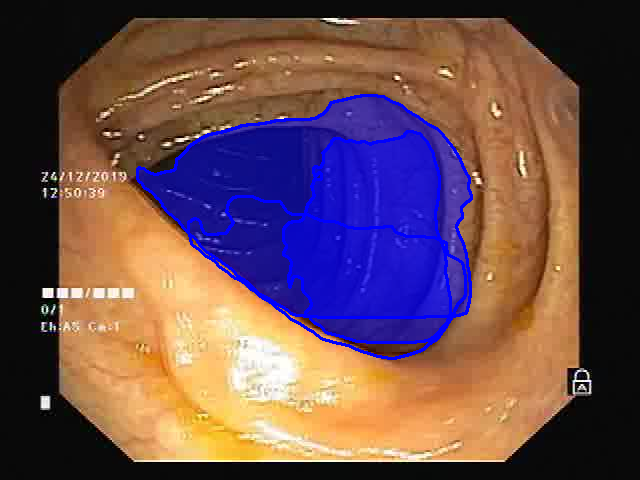

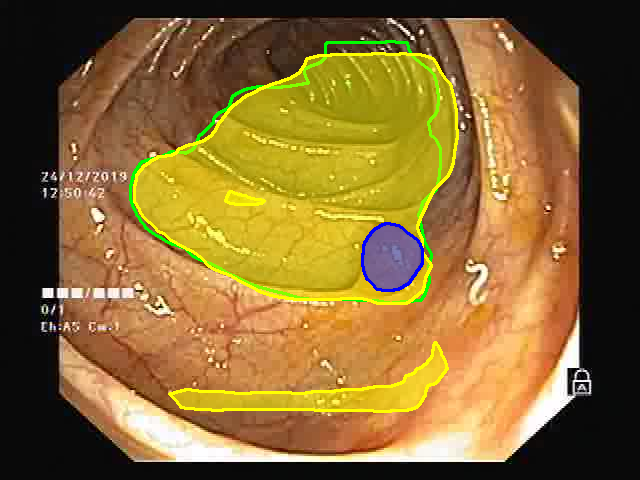

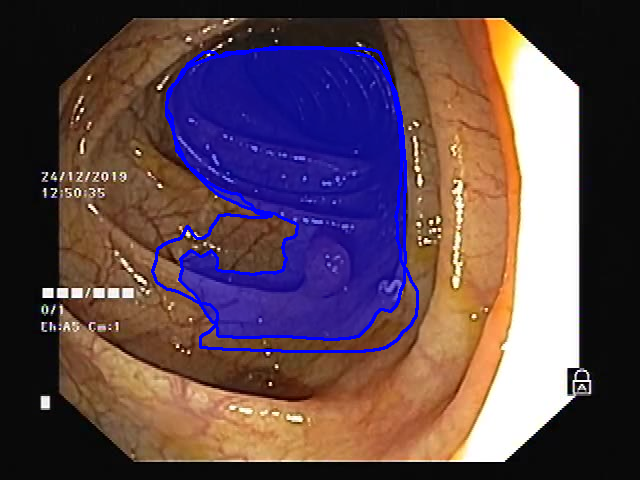

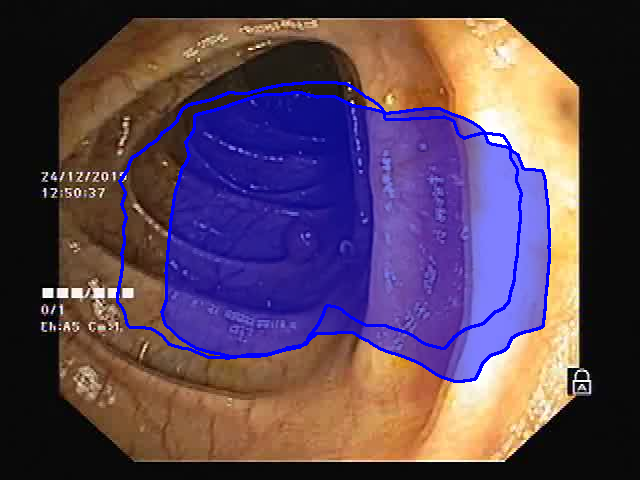

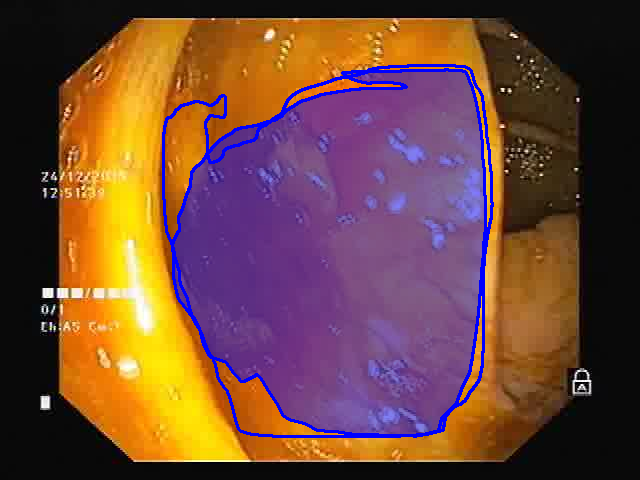

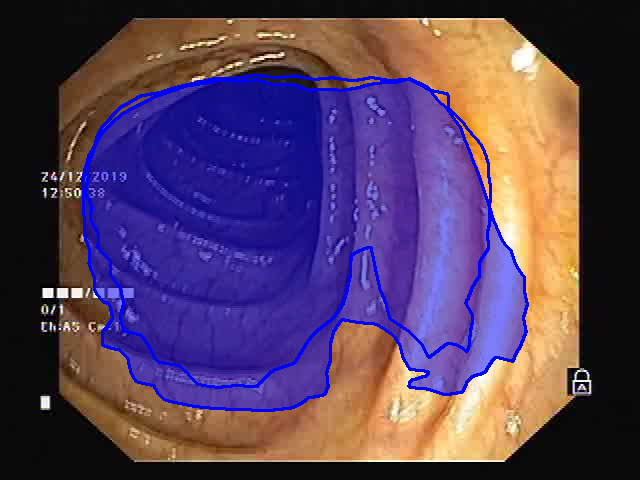

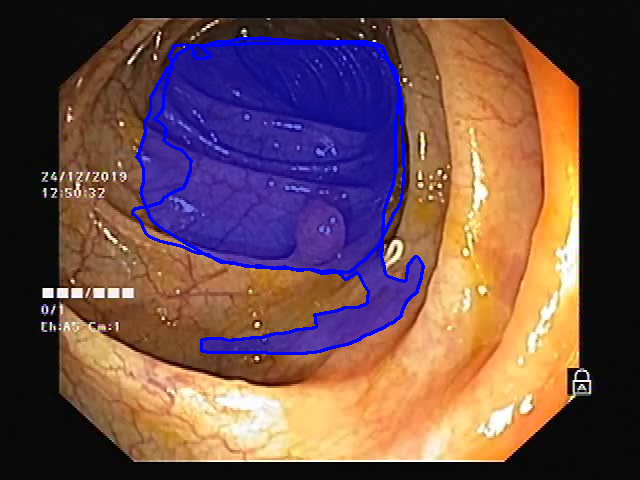

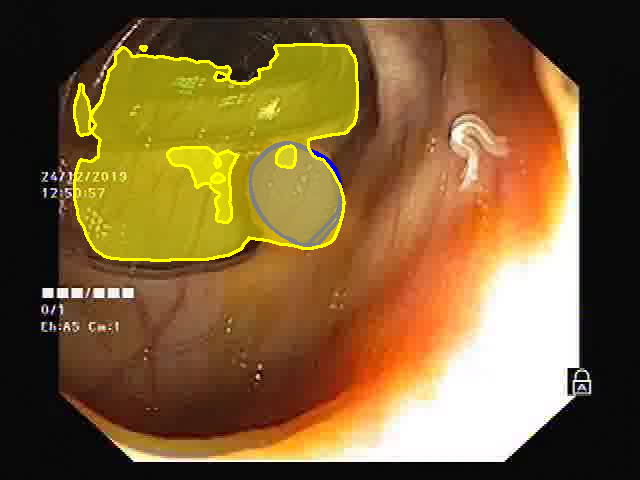

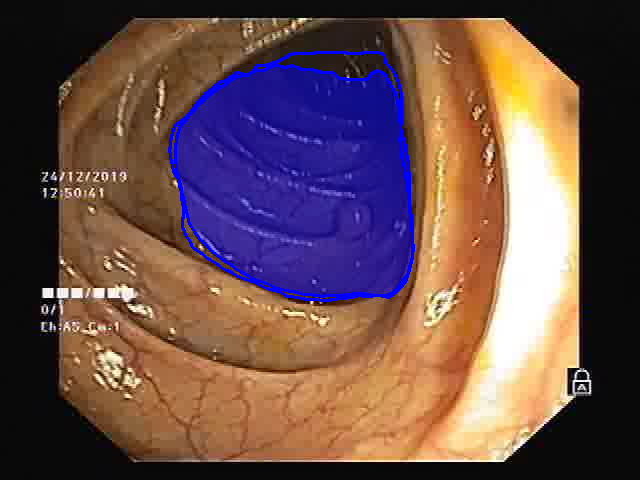

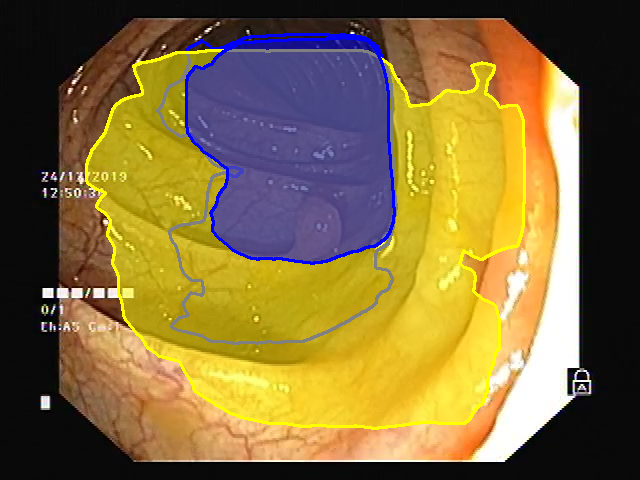

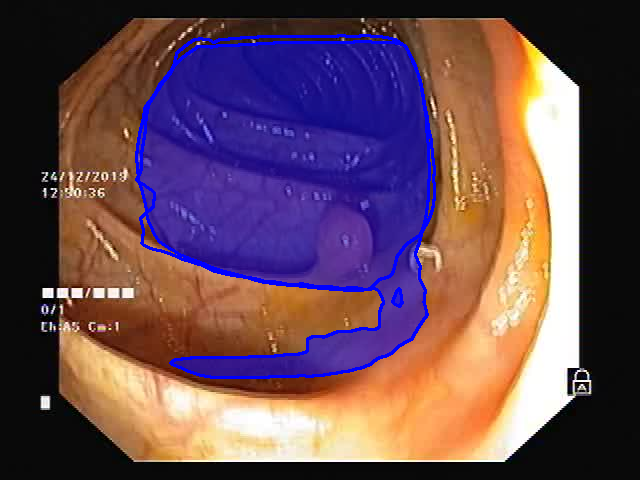

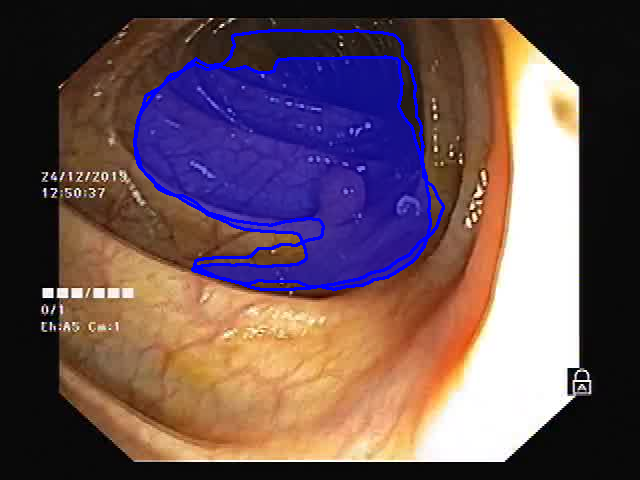

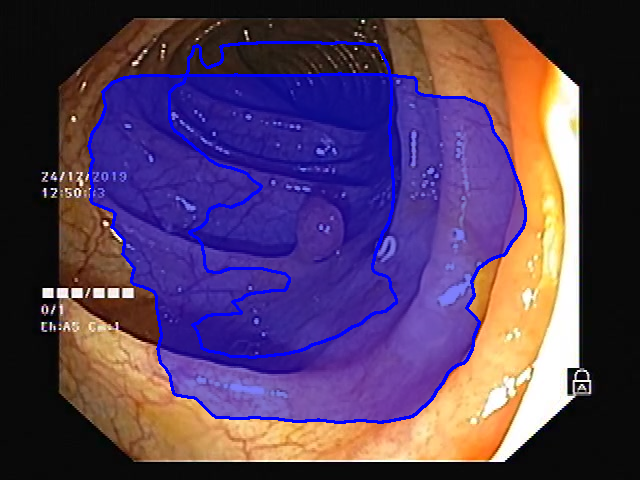

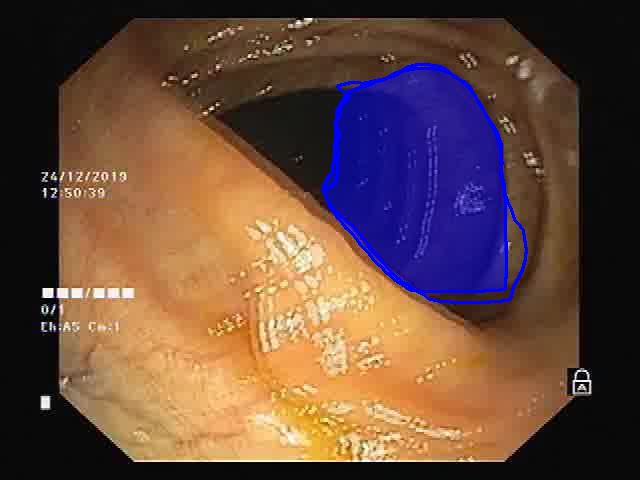

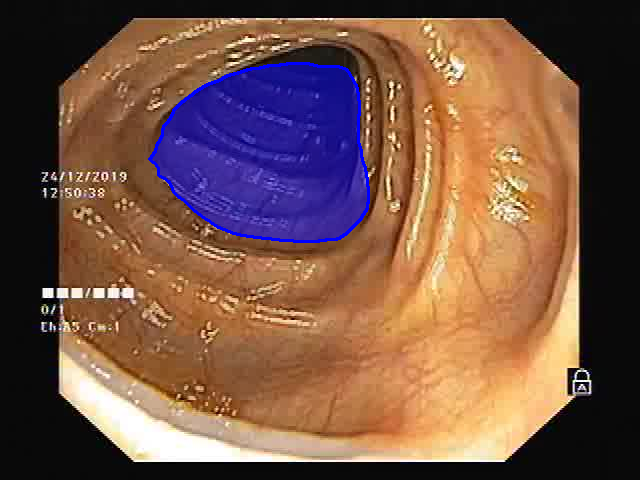

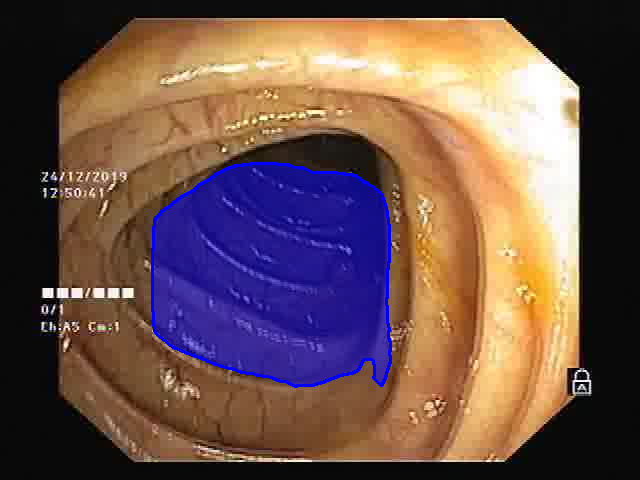

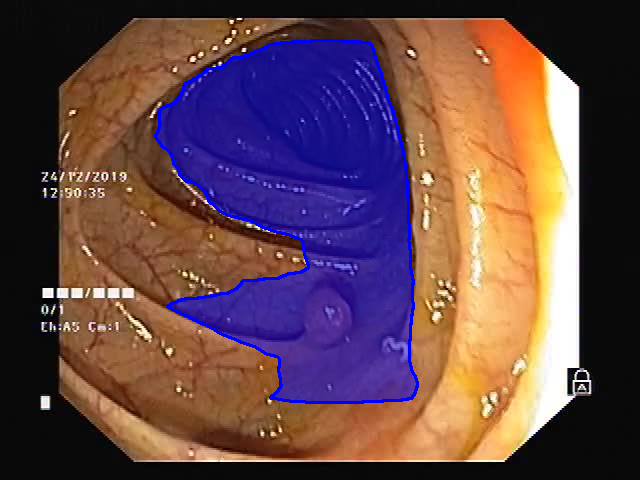

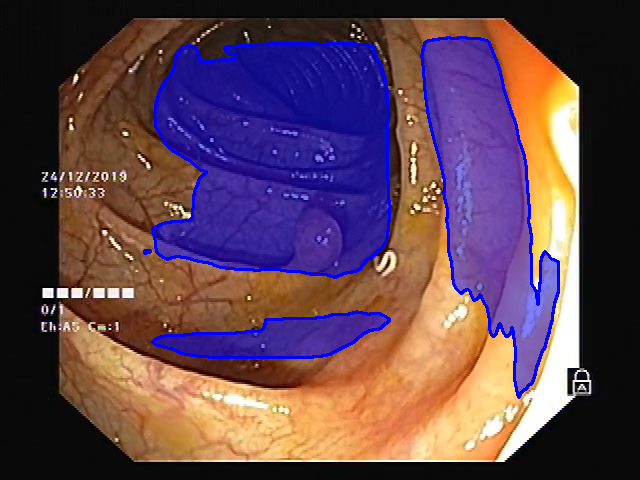

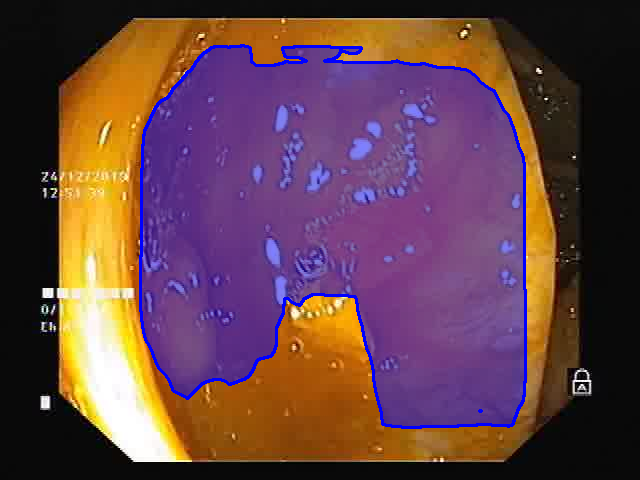

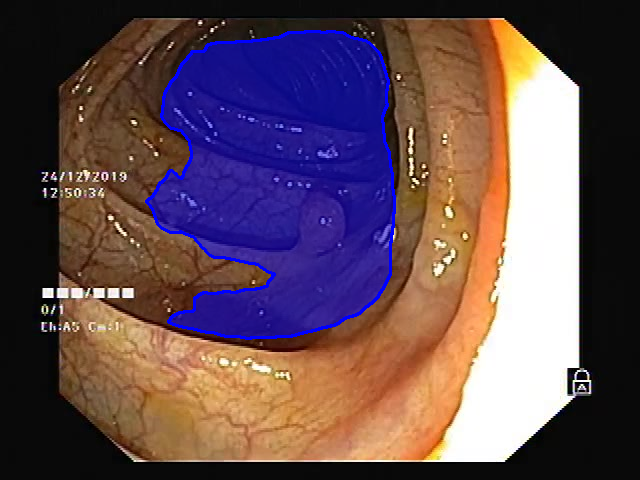

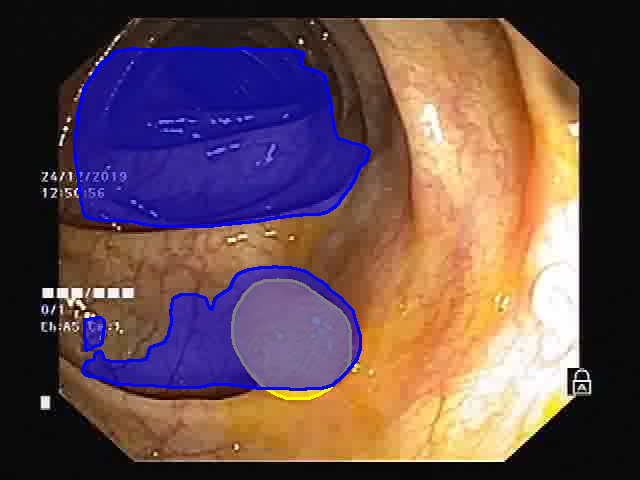

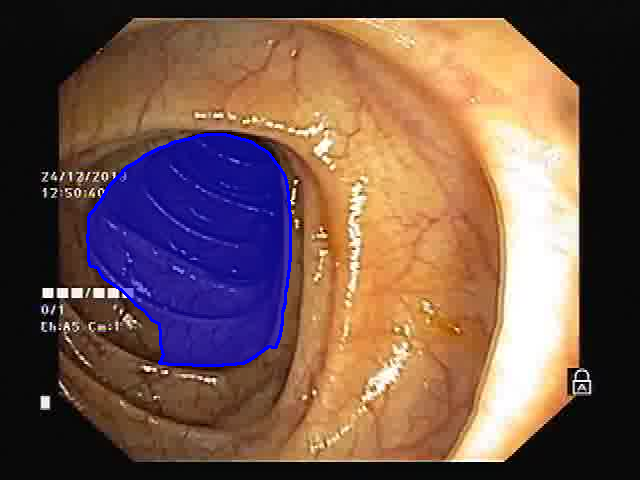

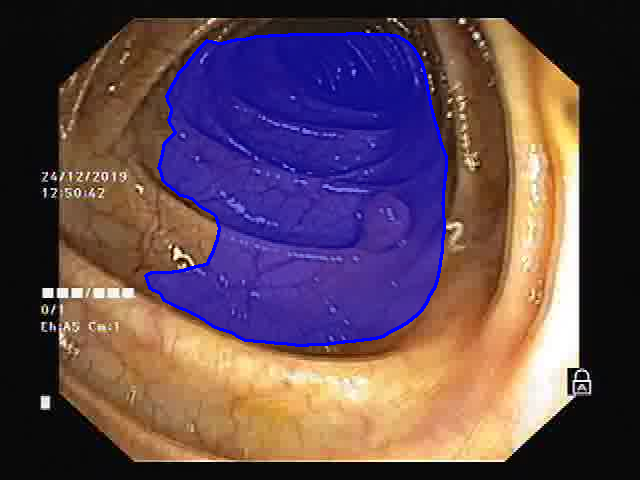

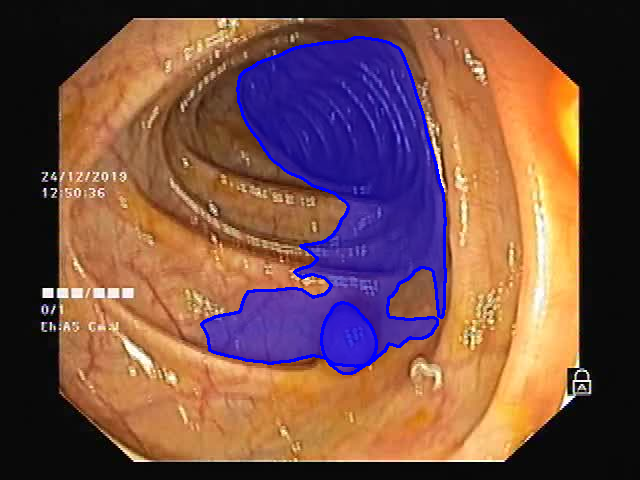

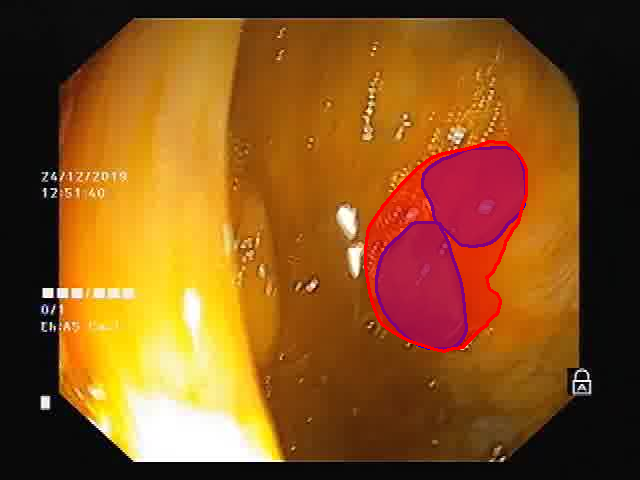

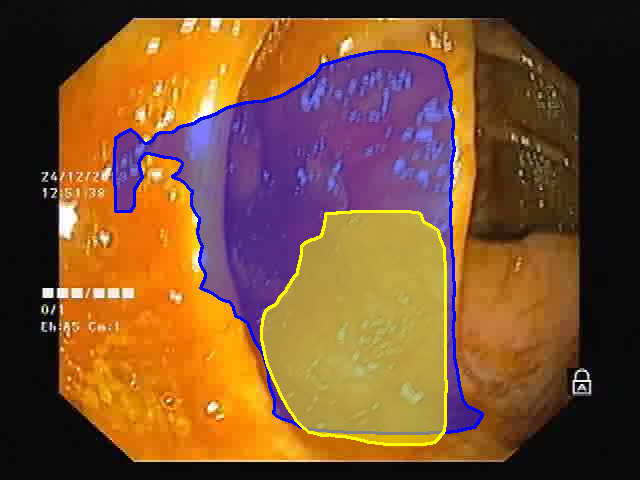

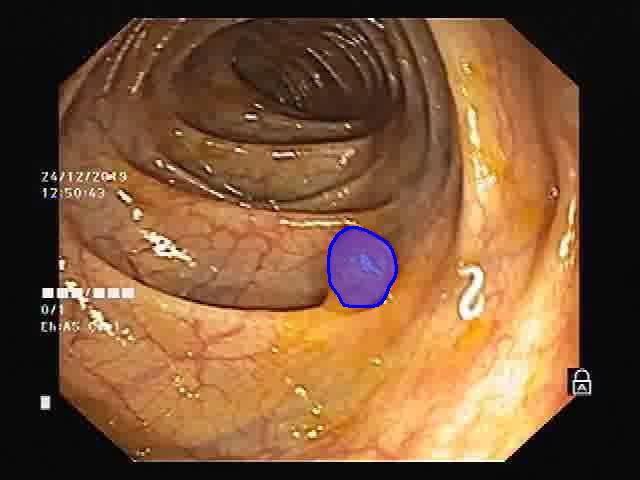

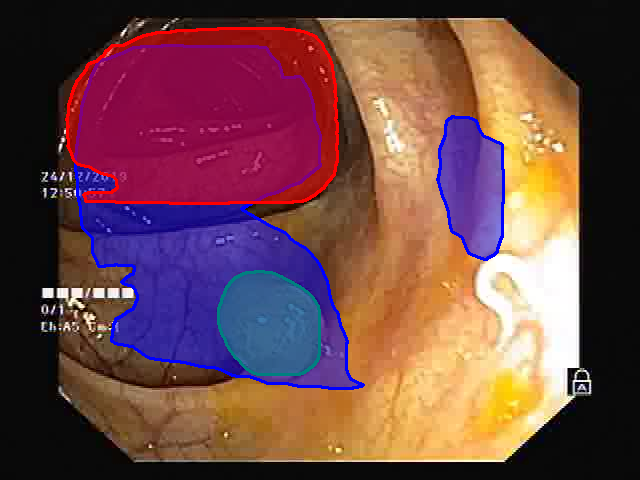

In [20]:
# Load Image
from mrcnn.visualize import random_colors,get_mask_contours,draw_mask
from google.colab.patches import cv2_imshow
test_model, inference_config = load_inference_model(1,"/content/Mask_RCNN/logs/object20211020T1428/mask_rcnn_object_0001.h5")

for img in my_list:
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Detect results
  r = test_model.detect([image])[0]
  object_count = len(r["class_ids"])
  if object_count == 0:
      continue
  colors = random_colors(object_count)
  for i in range(object_count):
      # 1. Mask
      mask = r["masks"][:, :, i]
      contours = get_mask_contours(mask)
      for cnt in contours:
          cv2.polylines(img, [cnt], True, colors[i], 2)
          img = draw_mask(img, [cnt], colors[i])
  cv2_imshow(img)